In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sqlalchemy import create_engine

%matplotlib inline

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [3]:
engine = create_engine("sqlite:///../db.sqlite3")
query = """
SELECT * FROM restaurant_orderitem
INNER JOIN restaurant_order ro on restaurant_orderitem.order_id = ro.id
INNER JOIN restaurant_product rp on restaurant_orderitem.product_id = rp.id
"""
df = pd.read_sql(query, engine)
engine.dispose()
df = df.drop(columns=["id", "order_id", "product_id"])
df["datetime"] = pd.to_datetime(df["datetime"])
df = df[["name", "price", "quantity", "datetime"]]
len(df)

74818

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

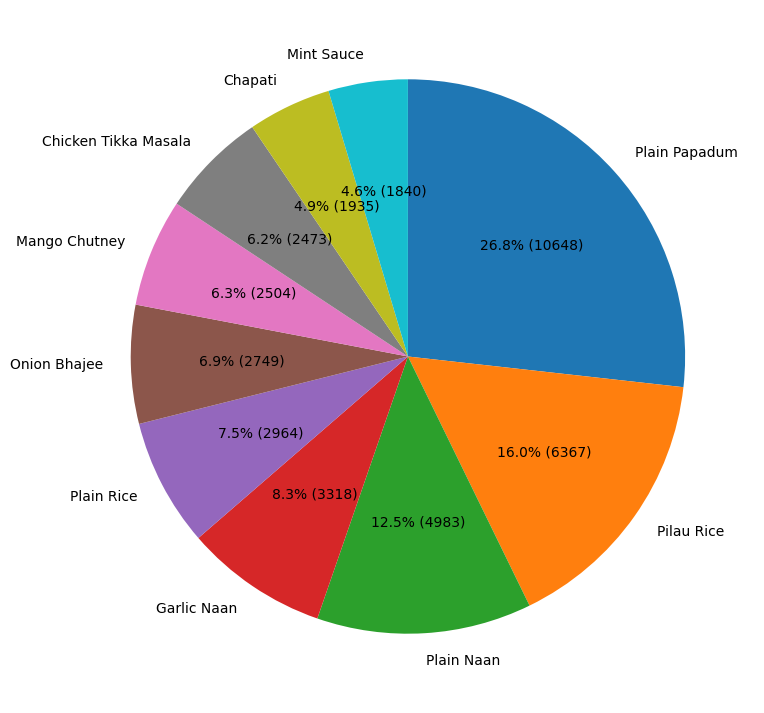

In [34]:
pop_dishes = df.groupby("name")["quantity"].sum().nlargest(10)
percentage_labels = [f"{(val / pop_dishes.sum() * 100):.1f}% ({val})" for val in pop_dishes]

plt.figure(figsize=(12, 9))
plt.pie(pop_dishes, labels=pop_dishes.index, autopct=lambda _: percentage_labels.pop(0), startangle=90, counterclock=False)

plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

<DatetimeArray>
['2019-08-03 20:25:00', '2019-08-03 20:17:00', '2019-08-03 20:09:00',
 '2019-08-03 20:01:00', '2019-08-03 19:44:00', '2019-08-03 19:42:00',
 '2019-08-03 19:41:00', '2019-08-03 19:29:00', '2019-08-03 19:28:00',
 '2019-08-03 19:26:00',
 ...
 '2018-09-19 13:20:00', '2018-09-16 22:18:00', '2018-09-02 21:03:00',
 '2018-07-01 22:37:00', '2017-12-01 18:30:00', '2017-08-27 14:02:00',
 '2017-02-23 18:20:00', '2018-12-24 13:22:00', '2017-08-31 12:20:00',
 '2017-08-31 10:04:00']
Length: 13081, dtype: datetime64[ns]

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

In [ ]:
# write your code here

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

In [ ]:
# write your code here